# 데이터 모델링

In [15]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.graph_objs as go 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
import numpy as np
%matplotlib inline
sns.set_style("darkgrid")

In [17]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import platform
platform.system()

'Linux'

In [18]:
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [19]:
from google.colab import drive
drive.mount('/content/mnt')

Drive already mounted at /content/mnt; to attempt to forcibly remount, call drive.mount("/content/mnt", force_remount=True).


In [20]:
data_folder = '/content/mnt/MyDrive/data/국민건강보험공단_진료내역정보_20191231'

In [21]:
df_1 = pd.read_csv(f'{data_folder}/T20_2019_1백만.1.csv', encoding='euc-kr')
df_2 = pd.read_csv(f'{data_folder}/T20_2019_1백만.2.csv', encoding='euc-kr')
df_3 = pd.read_csv(f'{data_folder}/T20_2019_1백만.3.csv', encoding='euc-kr')

In [22]:
df = pd.concat([df_1, df_2, df_3])

In [23]:
from scipy.stats import chi2_contingency

In [24]:
#df1 = pd.read_csv("C:/Users/sweet/OneDrive/바탕 화면/국민건강보험공단_진료내역정보_20191231/T20_2019_1백만.1.csv",encoding='euc-kr')
#df2 = pd.read_csv("C:/Users/sweet/OneDrive/바탕 화면/국민건강보험공단_진료내역정보_20191231/T20_2019_1백만.2.csv",encoding='euc-kr')
#df3 = pd.read_csv("C:/Users/sweet/OneDrive/바탕 화면/국민건강보험공단_진료내역정보_20191231/T20_2019_1백만.3.csv",encoding='euc-kr')
#df = pd.concat([df1, df2, df3])

In [25]:
# 모데링 - 필요 데이터만 추출
df_train = df[['성별코드', '연령대코드', '시도코드', '서식코드', '진료과목코드', '주상병코드', '부상병코드', '심결가산율']].copy()
# 서식코드 0(미입원) , 1(입원) 주,부상병코드 맨 앞자리 알파벳만 추출
df_train['서식코드'] = df_train['서식코드'].apply(lambda x: 1 if x == 2 else 0) 
df_train['주상병코드'] = df_train['주상병코드'].apply(lambda x: x[:1])
df_train['부상병코드'] = df_train['부상병코드'].apply(lambda x: x[:1])

# 주, 부상병코드 알파벳 인덱싱 
eng_list = ['A','B','C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
code_dict = dict(zip(eng_list, [i for i in range(len(eng_list))]))
df_train['주상병코드'] = df_train['주상병코드'].apply(lambda x: code_dict[x])
df_train['부상병코드'] = df_train['부상병코드'].apply(lambda x: code_dict[x])

# 심결가산율 카테고리화 및 인덱싱
rate_list = pd.DataFrame(df['심결가산율'].value_counts()).index
rate_list = sorted(rate_list)
rate_dict = dict(zip(rate_list, [i for i in range(len(rate_list))]))
df_train['심결가산율'] = df_train['심결가산율'].apply(lambda x: rate_dict[x])

In [26]:
for i in df_train.columns:
    df_train[i] = df_train[i].astype('category')

In [27]:
df_train.dtypes

성별코드      category
연령대코드     category
시도코드      category
서식코드      category
진료과목코드    category
주상병코드     category
부상병코드     category
심결가산율     category
dtype: object

In [28]:
df_train.head(3)

,성별코드,연령대코드,시도코드,서식코드,진료과목코드,주상병코드,부상병코드,심결가산율
0,2,12,46,0,5,12,12,3
1,2,12,46,0,1,4,13,3
2,2,12,46,0,1,13,4,3


In [29]:
df_train.to_csv("df_train.csv", encoding="euc-kr")

# 모델링 실패

In [15]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

In [16]:
# 표준화
data1 = minmax_scale(df_train)
data2 = scale(df_train)

In [18]:
# original
sns.jointplot(df_train.주상병코드, df_train[:,4])
plt.show()

TypeError: ignored

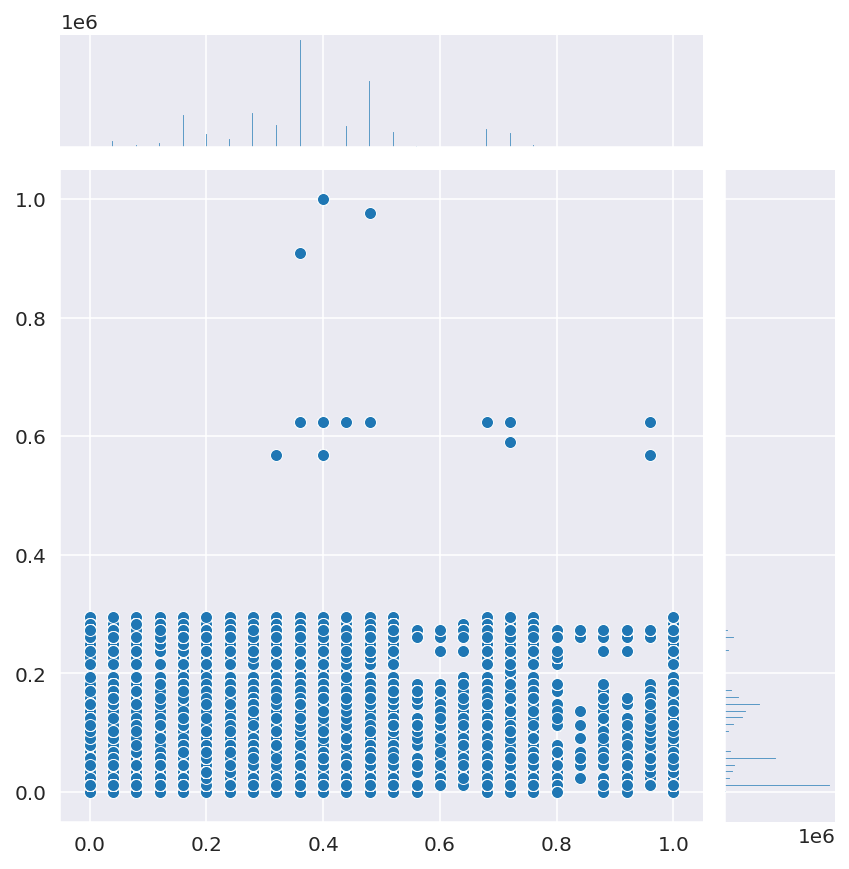

In [19]:
# minmax
sns.jointplot(data1[:,6], data1[:,4])
plt.show()

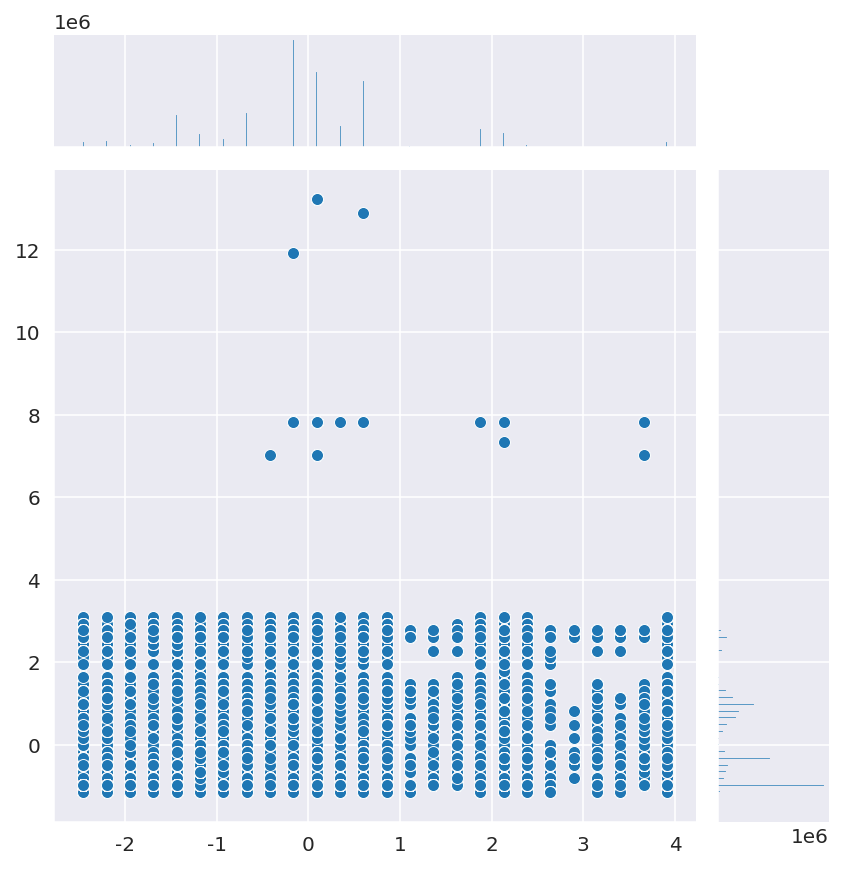

In [20]:
# scale
sns.jointplot(data2[:,6], data2[:,4])
plt.show()

In [21]:
# 정규화
from sklearn.preprocessing import scale, normalize
y1 = scale(df_train)
y2 = normalize(df_train)

In [22]:
print("original x:\n", data1)
print("scale:\n", y1)
print("norms (scale)\n", np.linalg.norm(y1, axis=1))
print("normailze:\n", y2)
print("norms (normalize)\n", np.linalg.norm(y2, axis=1))

original x:
 [[1.         0.64705882 0.92105263 ... 0.48       0.48       0.75      ]
 [1.         0.64705882 0.92105263 ... 0.16       0.52       0.75      ]
 [1.         0.64705882 0.92105263 ... 0.52       0.16       0.75      ]
 ...
 [1.         0.         0.94736842 ... 0.28       0.6        0.75      ]
 [1.         0.         0.94736842 ... 0.6        0.6        0.75      ]
 [1.         0.         0.94736842 ... 0.36       0.36       0.25      ]]
scale:
 [[ 0.87944496  0.35185335  0.95777235 ...  0.56426101  0.60249328
   1.7998549 ]
 [ 0.87944496  0.35185335  0.95777235 ... -1.37655488  0.85722052
   1.7998549 ]
 [ 0.87944496  0.35185335  0.95777235 ...  0.80686299 -1.43532468
   1.7998549 ]
 ...
 [ 0.87944496 -1.87445866  1.03631955 ... -0.64874892  1.36667501
   1.7998549 ]
 [ 0.87944496 -1.87445866  1.03631955 ...  1.29206696  1.36667501
   1.7998549 ]
 [ 0.87944496 -1.87445866  1.03631955 ... -0.16354495 -0.16168846
  -0.50331869]]
norms (scale)
 [2.42182176 2.94421209 2.958

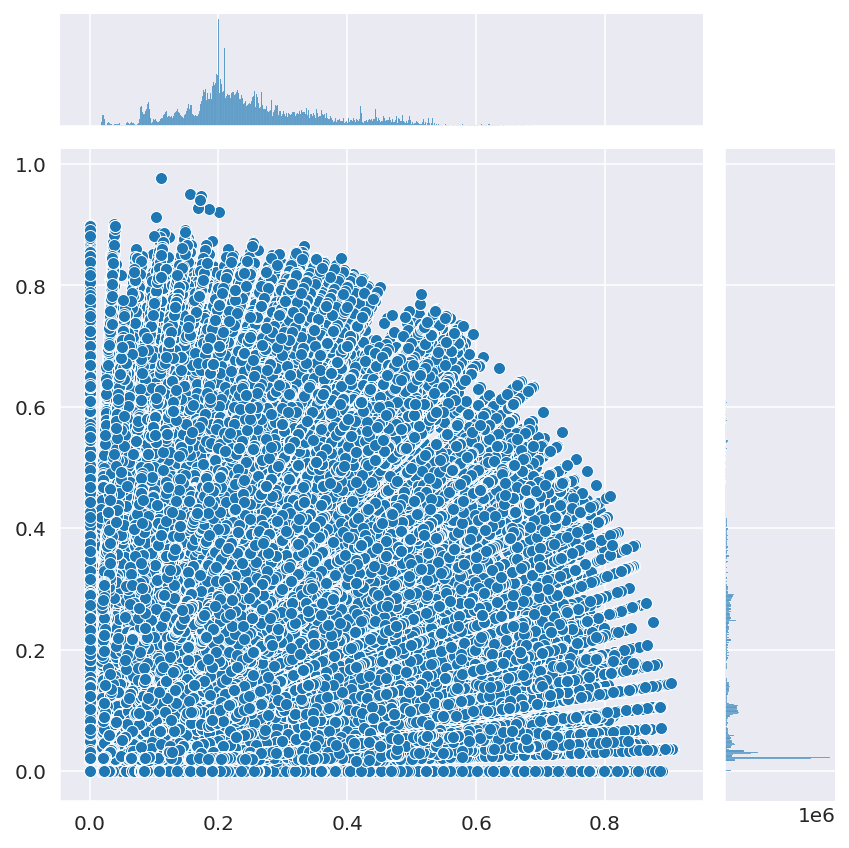

In [23]:
sns.jointplot(y2[:, 6], y2[:, 4])
plt.show()

## kNN

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# 원핫인코딩부터
df_train_dummy = pd.get_dummies(df_train, columns=['서식코드'], prefix='서식코드-OH')

In [ ]:
df_train_dummy.head(2)

### kNN = 3 으로 적용

In [27]:
column_train = ['성별코드', '연령대코드', '시도코드', '진료과목코드', '주상병코드',	'부상병코드', '심결가산율']
neigh_3 = KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
neigh_3_train = neigh_3.fit(df_train[column_train], df_train['서식코드'])

In [ ]:
new_data_1 = [2, 12, 46, 1, 13, 4, 3]

In [ ]:
neigh_3_class = neigh_3_train.preidict(new_data_1)

In [ ]:
print(neigh_3_class)

### kNN = 7 로 적용

In [ ]:
neigh_7 = KNeighborsClassifier(n_neighbors= 7, weights= 'distance')

In [ ]:
neigh_7_train = neigh_7.fit(df_train[column_train], df_train['서식코드'])

In [ ]:
neigh_7_class = neigh_7_train.preidict(new_data_1)

In [ ]:
print(neigh_7_class)

### accuracy 평가

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_train, test_size=0.33)

In [ ]:
neigh3 = KNeighborsClassifier(n_neighbors=3, weights='distance')
neigh3.fit(X_train, y_train)

In [ ]:
print('-----------------3개의 이웃 데이터----------------')
print(classification_report(y_test, neigh3.predict(X_test)))

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
multinomial_model = MultinomialNB()
multinomial_model

In [ ]:
multinomial_model.fit(df_train[column_train], df_train['서식코드'])

In [ ]:
multinomial_model.predict([[2, 12, 46, 1, 13, 4, 3]])

In [ ]:
multinomial_model.predict_proba([[2, 12, 46, 1, 13, 4, 3]])

In [ ]:
print(classification_report(y_test, multinomial_model.predict(X_test)))

In [ ]:
print(confusion_matrix(y_test, multinomial_model.predict(X_test)))

## Decision Tree

In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier()
clf

In [ ]:
clf.fit(df_train[column_train], df_train['서식코드'])

In [ ]:
clf.predict([[2, 12, 46, 1, 13, 4, 3]])

## crosstab

In [ ]:
# Cross tabulation between 진료과목코드 and 서식코드
CrosstabResult_1=pd.crosstab(index=df_train['서식코드'],columns=df_train['진료과목코드'])
print(CrosstabResult_1)

In [ ]:
# Performing Chi-sq test
ChiSqResult_1 = chi2_contingency(CrosstabResult_1)

In [ ]:
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult_1[1])

In [ ]:
# Cross tabulation between 주상병코드 and 심결가산율
CrosstabResult_2=pd.crosstab(index=df_train['주상병코드'],columns=df_train['심결가산율'])
print(CrosstabResult_2)

In [ ]:
# Performing Chi-sq test
ChiSqResult_2 = chi2_contingency(CrosstabResult_2)

In [ ]:
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult_2[1])

In [ ]:
# Cross tabulation between 연령대코드 and 서식코드
CrosstabResult_3=pd.crosstab(index=df_train['연령대코드'],columns=df_train['서식코드'])
print(CrosstabResult_3)

In [ ]:
# Performing Chi-sq test
ChiSqResult_3 = chi2_contingency(CrosstabResult_3)

In [ ]:
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult_3[1])

## 원핫인코딩

In [ ]:
# 원핫인코딩 해서 각각 연관성 돌려본 후 knn등 모델링한 것 넣기

In [ ]:
df_train.head()

In [ ]:
df_train_dummy = pd.get_dummies(df_train, columns=['서식코드'], prefix='서식코드-OH')
df_test_dummy = pd.get_dummies(df_test, columns=['서식코드'], prefix='서식코드-OH')

In [ ]:
# 정범님 코드 참고
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data

df_train[['진료과목코드', '서식코드']]
dummy_columns = ["진료과목코드"]
df_train_dummy = dummy_data(df_train[['진료과목코드', '서식코드']], dummy_columns)

In [ ]:
# Cross tabulation between 진료과목코드 and 서식코드
CrosstabResult_1=pd.crosstab(index=df_train['진료과목코드'],columns=df_train_dummy)
print(CrosstabResult_1)

In [ ]:
# Performing Chi-sq test between 진료과목코드 and 서식코드
ChiSqResult_1 = chi2_contingency(CrosstabResult_1)

In [ ]:
# between 진료과목코드 and 서식코드
#  P-Value is the Probability of H0 being True 
# If P-Value>0.05 then only we Accept the assumption(H0)
print('The P-Value of the ChiSq Test is:', ChiSqResult_1[1])

In [ ]:
# Cross tabulation between 주상병코드 and 서식코드
CrosstabResult_2=pd.crosstab(index=df_train['주상병코드'],columns=df_train_dummy)
print(CrosstabResult_2)

In [ ]:
# Performing Chi-sq test between 주상병코드 and 심결가산율
ChiSqResult_2 = chi2_contingency(CrosstabResult_2)

In [ ]:
# between 주상병코드 and 심결가산율
#  P-Value is the Probability of H0 being True 
# If P-Value>0.05 then only we Accept the assumption(H0)
print('The P-Value of the ChiSq Test is:', ChiSqResult_2[1])

In [ ]:
# 원핫인코딩에 문제가 있음. 원인찾기

# 모델링2

## Over & Under sampling

In [1]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler()
rus = RandomUnderSampler()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# over/undersampled_data, oversampled_label = ros.fit_resample(data, label)
# over/undersampled_data = pd.DataFrame(over/undersampled_data, columns = df.columns)

oversampled_data, oversampled_label = ros.fit_resample(df_train[['성별코드', '연령대코드', '시도코드', '진료과목코드', '주상병코드', '부상병코드','심결가산율']].copy(), df_train[['서식코드']].copy())
oversampled_data = pd.DataFrame(oversampled_data, columns =['성별코드', '연령대코드', '시도코드', '진료과목코드', '주상병코드', '부상병코드','심결가산율'])

undersampled_data, undersampled_label = rus.fit_resample(df_train[['성별코드', '연령대코드', '시도코드', '진료과목코드', '주상병코드', '부상병코드','심결가산율']].copy(), df_train[['서식코드']].copy())
undersampled_data = pd.DataFrame(undersampled_data, columns =['성별코드', '연령대코드', '시도코드', '진료과목코드', '주상병코드', '부상병코드','심결가산율'])

NameError: ignored

### oversample data

In [19]:
oversampled_data['서식코드'] = oversampled_label
oversampled_data.head()

,성별코드,연령대코드,시도코드,진료과목코드,주상병코드,부상병코드,심결가산율,서식코드
0,2,12,46,5,12,12,3,0
1,2,12,46,1,4,13,3,0
2,2,12,46,1,13,4,3,0
3,2,12,46,1,4,13,3,1
4,2,12,46,13,7,9,1,0


In [20]:
oversampled_data.tail(3)

,성별코드,연령대코드,시도코드,진료과목코드,주상병코드,부상병코드,심결가산율,서식코드
25788763,1,12,41,6,12,12,2,1
25788764,1,11,28,3,5,5,2,1
25788765,2,13,41,2,8,4,4,1


In [21]:
print(f"전체환자 데이터 수 : {len(oversampled_data)} / 입원환자 데이터 수 : {len(oversampled_data[oversampled_data['서식코드'] == 1])} / 비입원환자 데이터 수 : {len(oversampled_data[oversampled_data['서식코드'] == 0])}")

전체환자 데이터 수 : 25788766 / 입원환자 데이터 수 : 12894383 / 비입원환자 데이터 수 : 12894383


In [ ]:
# 정범님 코드 참고
df_train1 = oversampled_data[['서식코드']].copy() # 테스트로 사용할 컬럼들
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data
dummy_columns = ['서식코드']
df_train1_dummy = dummy_data(oversampled_data, dummy_columns)
df_train1_dummy

### undersample data

In [ ]:
undersampled_data['서식코드'] = undersampled_label
undersampled_data.head()

In [ ]:
print(f"전체환자 데이터 수 : {len(undersampled_data)} / 입원환자 데이터 수 : {len(undersampled_data[undersampled_data['서식코드'] == 1])} / 비입원환자 데이터 수 : {len(undersampled_data[undersampled_data['서식코드'] == 0])}")

In [ ]:
# 정범님 코드 참고
df_train2 = undersampled_data[['서식코드']].copy() # 테스트로 사용할 컬럼들
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data
dummy_columns = ['서식코드']
df_train2_dummy = dummy_data(undersampled_data, dummy_columns)
df_train2_dummy

## kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

### Undersampling + One-hot 

In [ ]:
X = df_train2_dummy.iloc[:, :-2]
y = df_train2_dummy.iloc[:, 7:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 7)

In [ ]:
n = 7
neigh_n = KNeighborsClassifier(n_neighbors = n, weights = 'distance')
neigh_n.fit(X_train, y_train)
y_pred = neigh_n.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(f'Under + One-hot Accuracy : {accuracy*100}')

In [ ]:
n = 11
neigh_n = KNeighborsClassifier(n_neighbors = n, weights = 'distance')
neigh_n.fit(X_train, y_train)
y_pred = neigh_n.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(f'Under + One-hot Accuracy : {accuracy*100}')

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = neigh_n.predict(X_test)
cf = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
plt.figure(figsize = (7, 5))
sns.heatmap(cf, annot = True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [ ]:
import matplotlib.pyplot as plt
k_list = range(1,25)
accuracies = []
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
  classifier.fit(X_train, y_train)
  accuracies.append(classifier.score(X_test, y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Test Accuracy")
plt.title("Under + One-hot Classifier Accuracy")
plt.show()

### Undersampling + original y

In [ ]:
columns =['성별코드', '연령대코드', '시도코드', '진료과목코드', '주상병코드', '부상병코드','심결가산율']
df_train_y = df_train.drop(columns, axis=1)
df_train_y

In [ ]:
undersampled_data_1, undersampled_label_1 = rus.fit_resample(df_train[['서식코드']].copy(), df_train[['서식코드']].copy())
undersampled_data_1 = pd.DataFrame(undersampled_data_1, columns =['서식코드'])
undersampled_data_1['서식코드'] = undersampled_label_1

In [ ]:
undersampled_data_1.tail()

In [ ]:
X = df_train2_dummy.iloc[:, :-2]
y = undersampled_data_1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 7)

In [ ]:
n = 11
neigh_n = KNeighborsClassifier(n_neighbors = n, weights = 'distance')
neigh_n.fit(X_train, y_train)
y_pred = neigh_n.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(f'Under + original Accuracy : {accuracy*100}')

In [ ]:
import matplotlib.pyplot as plt
k_list = range(1,25)
accuracies = []
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
  classifier.fit(X_train, y_train)
  accuracies.append(classifier.score(X_test, y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Test Accuracy")
plt.title("Under + original Classifier Accuracy")
plt.show()

### Oversampling + One-hot

In [ ]:
X = df_train1_dummy.iloc[:, :-2]
y = df_train1_dummy.iloc[:, 7:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 7)

In [ ]:
n = 11
neigh_n = KNeighborsClassifier(n_neighbors = n, weights = 'distance')
neigh_n.fit(X_train, y_train)
y_pred = neigh_n.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(f'Over + One-hot Accuracy : {accuracy*100}')

In [ ]:
import matplotlib.pyplot as plt
k_list = range(1,25)
accuracies = []
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
  classifier.fit(X_train, y_train)
  accuracies.append(classifier.score(X_test, y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Test Accuracy")
plt.title("Classifier Accuracy")
plt.show()

### Oversampling + original y

In [ ]:
oversampled_data_1, oversampled_label_1 = ros.fit_resample(df_train[['서식코드']].copy(), df_train[['서식코드']].copy())
oversampled_data_1 = pd.DataFrame(oversampled_data_1, columns =['서식코드'])
oversampled_data_1['서식코드'] = oversampled_label_1

In [ ]:
X = df_train1_dummy.iloc[:, :-2]
y = oversample_data_1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 7)

In [ ]:
n = 11
neigh_n = KNeighborsClassifier(n_neighbors = n, weights = 'distance')
neigh_n.fit(X_train, y_train)
y_pred = neigh_n.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(f'Over + original Accuracy : {accuracy*100}')

In [ ]:
import matplotlib.pyplot as plt
k_list = range(1,25)
accuracies = []
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
  classifier.fit(X_train, y_train)
  accuracies.append(classifier.score(X_test, y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Test Accuracy")
plt.title("Classifier Accuracy")
plt.show()

## Decision Tree

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

In [ ]:
X = df_train2_dummy.iloc[:, :-2]
y = undersampled_data_1
clf = clf.fit(X, y)

In [ ]:
tree.plot_tree(clf)

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("서식코드 결정 Tree") 

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
df_train2_dummy.

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# 모델링3

In [30]:
# 데이터셋 분리
# decision tree 해보기

## 데이터셋 분리

In [ ]:
X = df_train2_dummy.iloc[:, :-2]
y = undersampled_data_1

In [ ]:
X.shape, y.shape

In [ ]:
# train-test분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, straitfy=y)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(np.unique(y_train, return_counts=True))

In [ ]:
# train-validation분리
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, straitfy=y_train)
X_train.shape, X_val.shape, x_test.shape

## Decision tree

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

In [ ]:
# Decision Tree
tree.fit(X_train, y_train)
pred_train = tree.predict(X_train)
red_val = tree.predict(X_val)

In [ ]:
train_score = accuracy_score(y_train, pred_train)
val_score = accuracy_score(y_val, pre_val)
print("train set의 예측결과: {}, validation set의 예측결과: {}".format(train_score, val_score))

In [ ]:
pred_test = tree.predict(X_test)
test_score = accuracy_score(y_test, pred_test)
print("최종평가(test set): {}".format(test_score))